In [1]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv("./dataset/data.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
# To display basic information about the data type 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df['class'].value_counts()
# For each class we have 50 samples

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [6]:
# checking for null values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

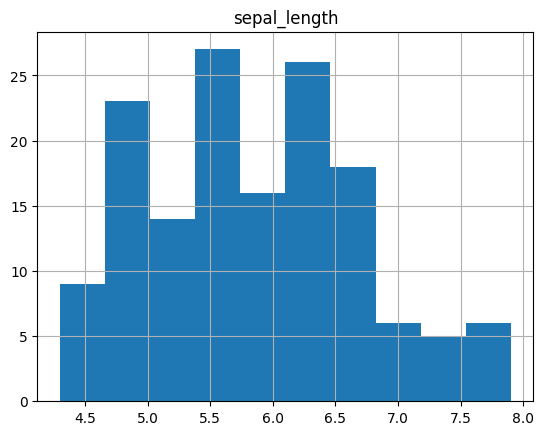

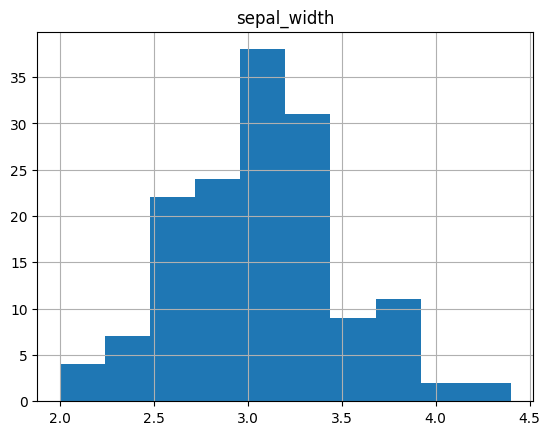

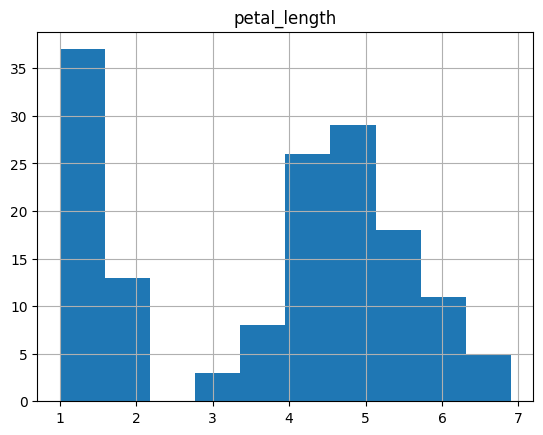

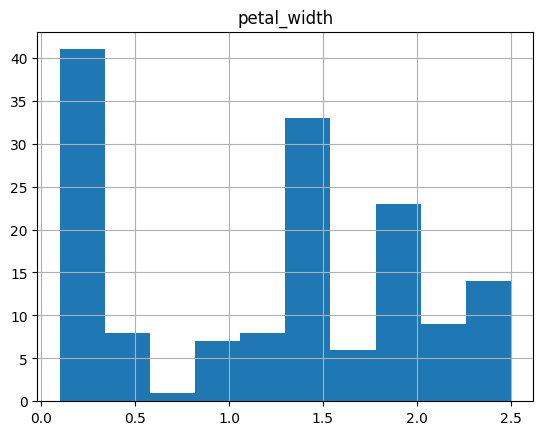

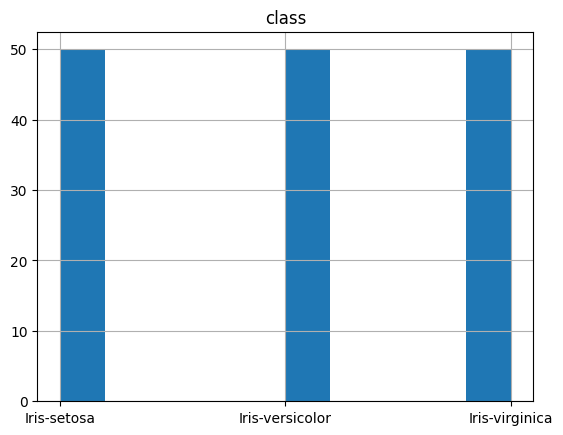

In [7]:
for col in df.columns: # created histogram to check the distribution of data points
    df[col].hist()
    plt.title(col)
    plt.show()

In [8]:
colors = ['red' , 'orange' , 'blue']
species = ['Iris-setosa','Iris-versicolor','Iris-virginica']

Text(0, 0.5, 'Sepal Width ')

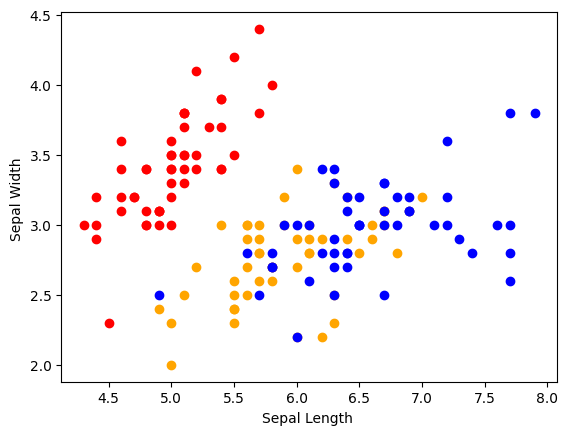

In [9]:
for i in range(3):
    x = df[df['class']== species[i]]
    plt.scatter(x['sepal_length'] , x['sepal_width'] , c= colors[i] , label = species[i])
plt.xlabel("Sepal Length " )
plt.ylabel("Sepal Width " )

Text(0, 0.5, 'Petal  Width ')

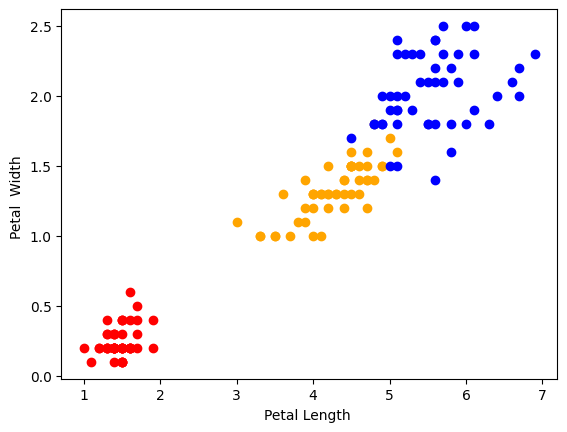

In [10]:
for i in range(3):
    x = df[df['class']== species[i]]
    plt.scatter(x['petal_length'] , x['petal_width'] , c= colors[i] , label = species[i])
plt.xlabel("Petal Length " )
plt.ylabel("Petal  Width " )

Text(0, 0.5, 'Sepal Length  ')

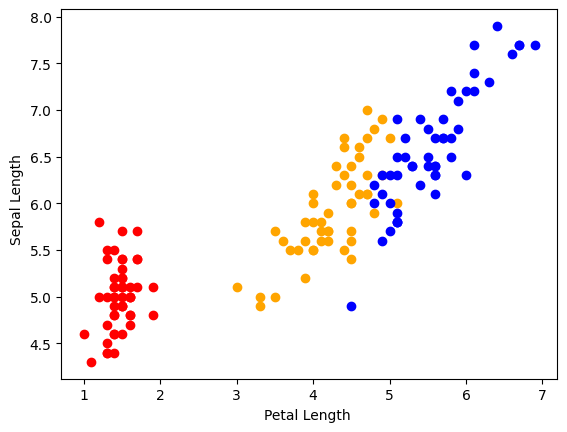

In [11]:
for i in range(3):
    x = df[df['class']== species[i]]
    plt.scatter(x['petal_length'] , x['sepal_length'] , c= colors[i] , label = species[i])
plt.xlabel("Petal Length " )
plt.ylabel("Sepal Length  " )

Text(0, 0.5, 'Sepal Width  ')

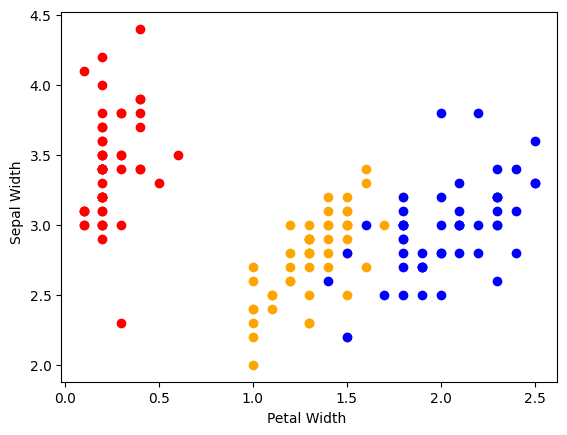

In [12]:
for i in range(3):
    x = df[df['class']== species[i]]
    plt.scatter(x['petal_width'] , x['sepal_width'] , c= colors[i] , label = species[i])
plt.xlabel("Petal Width " )
plt.ylabel("Sepal Width  " )

In [13]:
from sklearn.model_selection import train_test_split
x = df.drop(columns= ['class'])
y = df['class']
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.30 )

In [14]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [15]:
model.fit(x_train , y_train)

LogisticRegression()

In [16]:
print("Accuracy" , model.score(x_test ,y_test)*100 )

Accuracy 97.77777777777777


In [17]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [18]:
model.fit(x_train , y_train)

KNeighborsClassifier()

In [19]:
print("Accuracy" , model.score(x_test ,y_test)*100 )

Accuracy 95.55555555555556


In [20]:
import pickle

filename = 'saved_model.pkl'
try: 
    with open(filename, 'wb') as file: 
        pickle.dump(model, file)
    print("Model saved successfully")
except Exception as e:
    print("Model not saved:", e)

load_model = pickle.load(open(filename , 'rb'))
load_model.predict([[6.0,2.2,4.0,1.0]])

Model saved successfully


array(['Iris-versicolor'], dtype=object)

In [21]:
load_model.predict([[6.0,2.2,4.0,1.0]])

array(['Iris-versicolor'], dtype=object)

In [22]:
x_test.head()

,sepal_length,sepal_width,petal_length,petal_width
67,5.8,2.7,4.1,1.0
48,5.3,3.7,1.5,0.2
114,5.8,2.8,5.1,2.4
56,6.3,3.3,4.7,1.6
23,5.1,3.3,1.7,0.5


In [23]:
load_model.predict([[6.1 , 2.6 , 5.6 , 1.4]])

array(['Iris-virginica'], dtype=object)